# <font color='darkblue'>__Data Science Fundamentals__</font>

### <font color='darkblue'>__Tasks (with solutions)__</font>
__[Link to tasks at the end of the notebook](#tasks)__<br>

# <font color='darkblue'>Databases and SQL with Python</font>

In [42]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

__More information about Datatypes in SQLite3__<br>
https://www.sqlite.org/datatype3.html

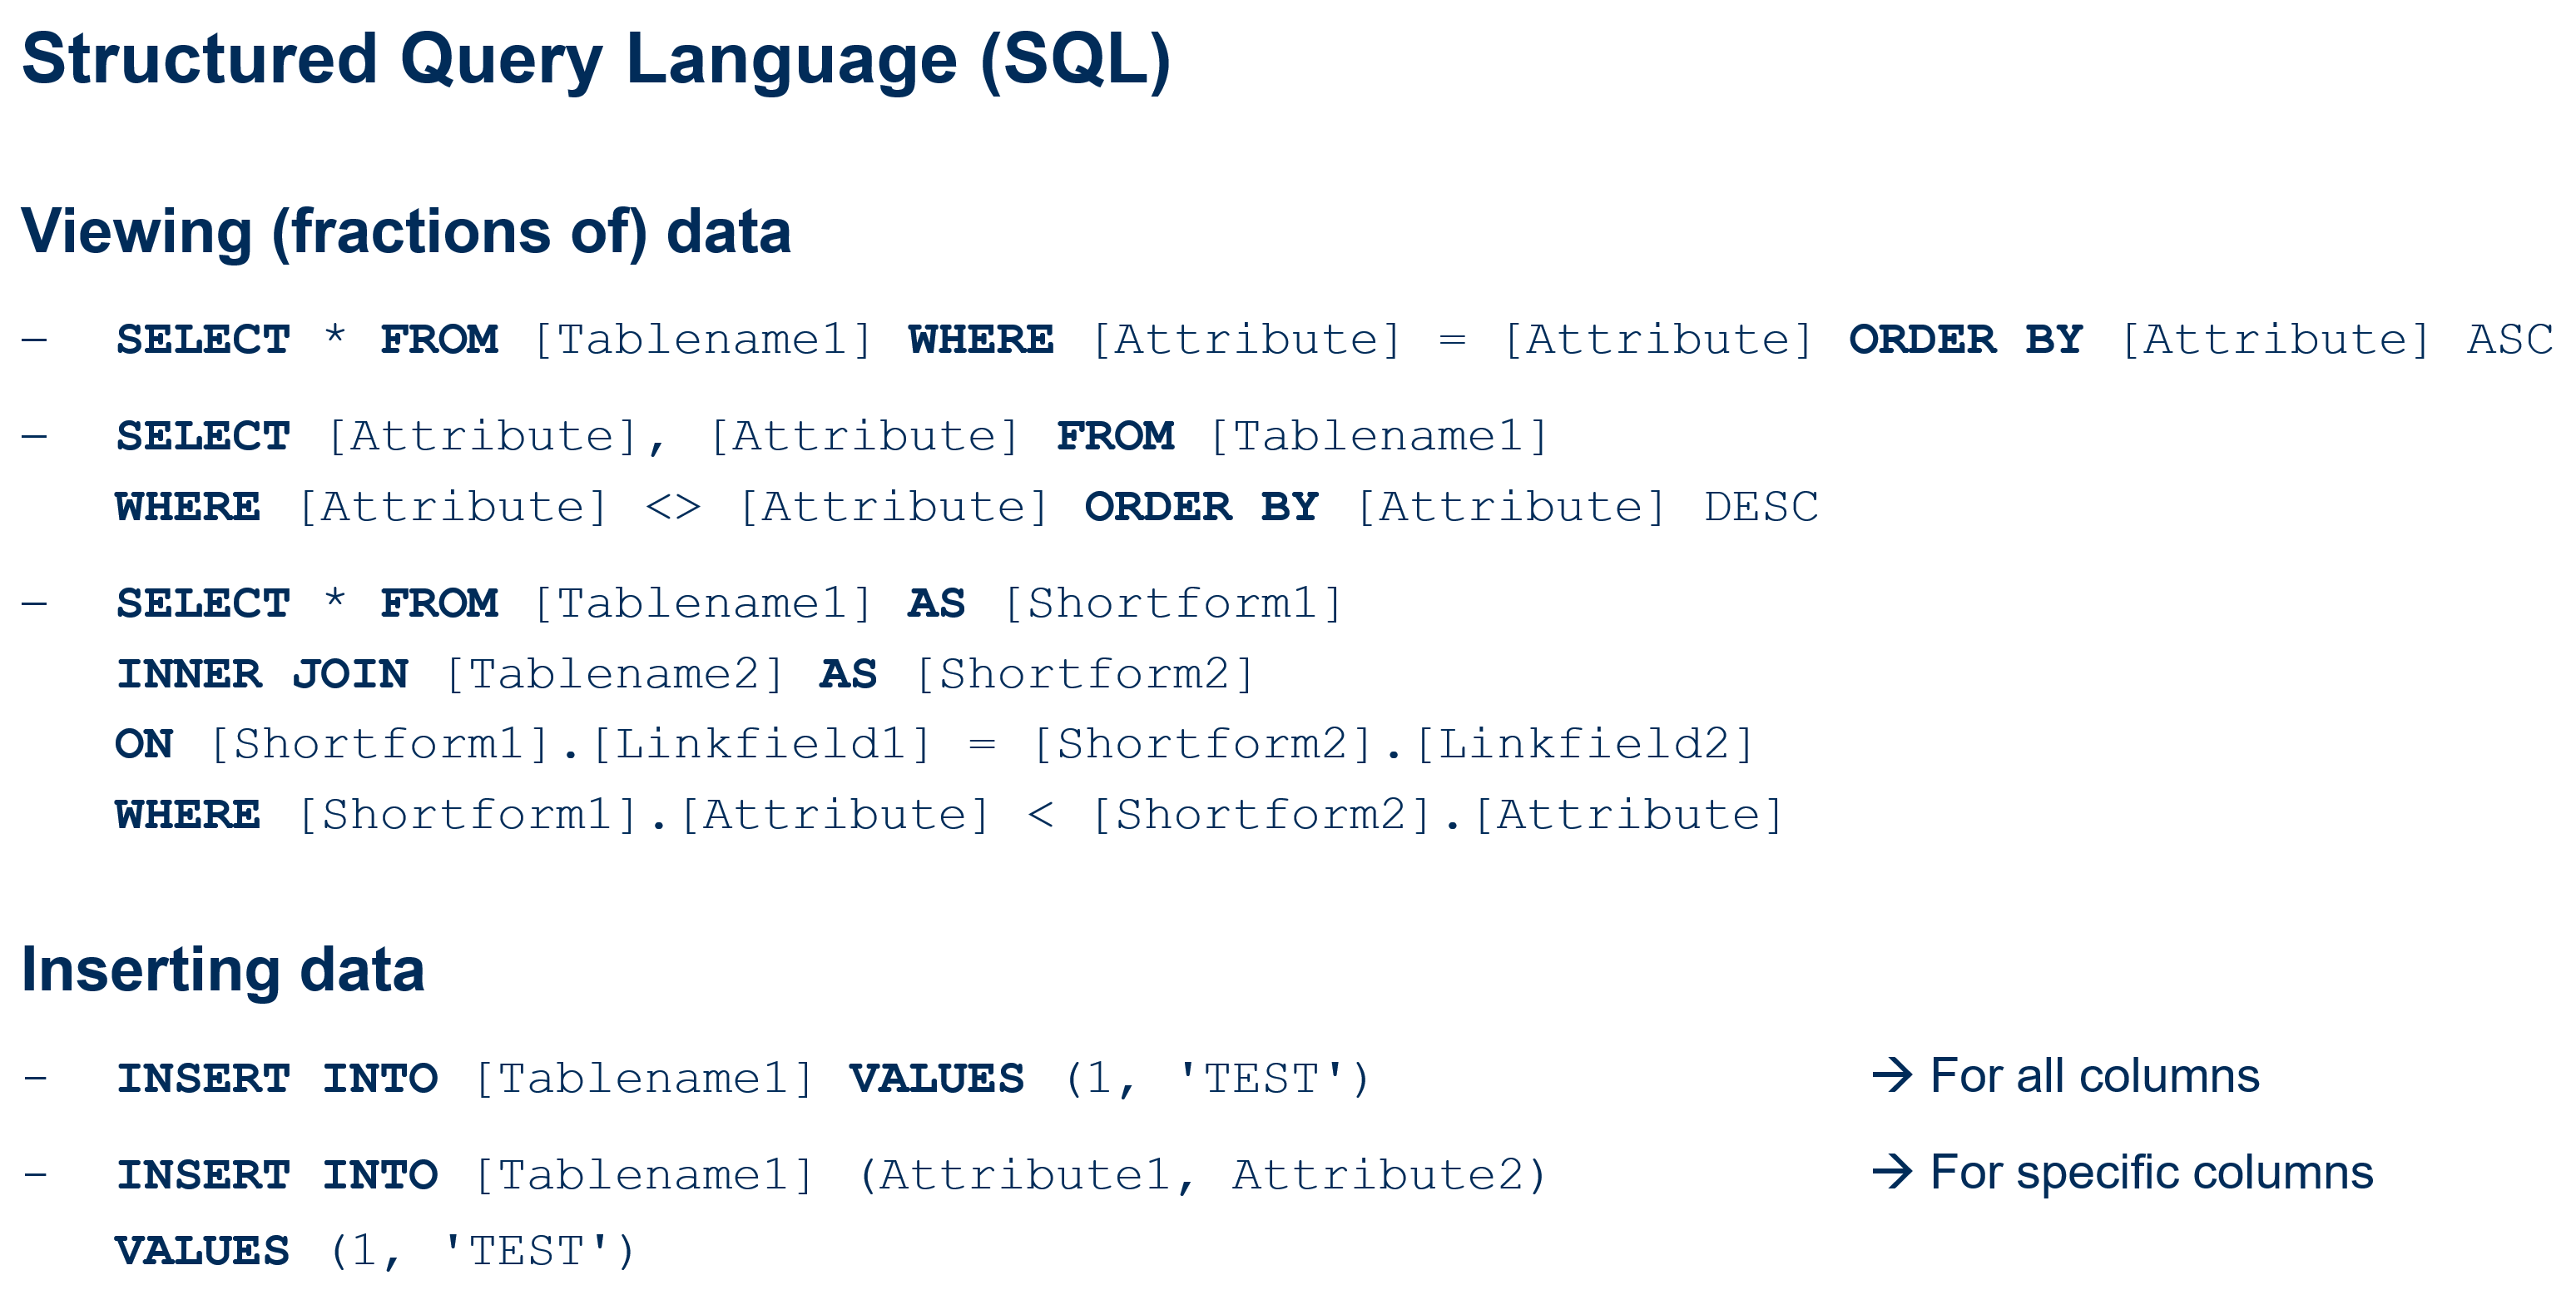

In [43]:
from IPython.display import Image
Image("img/sql1.PNG", width=700)

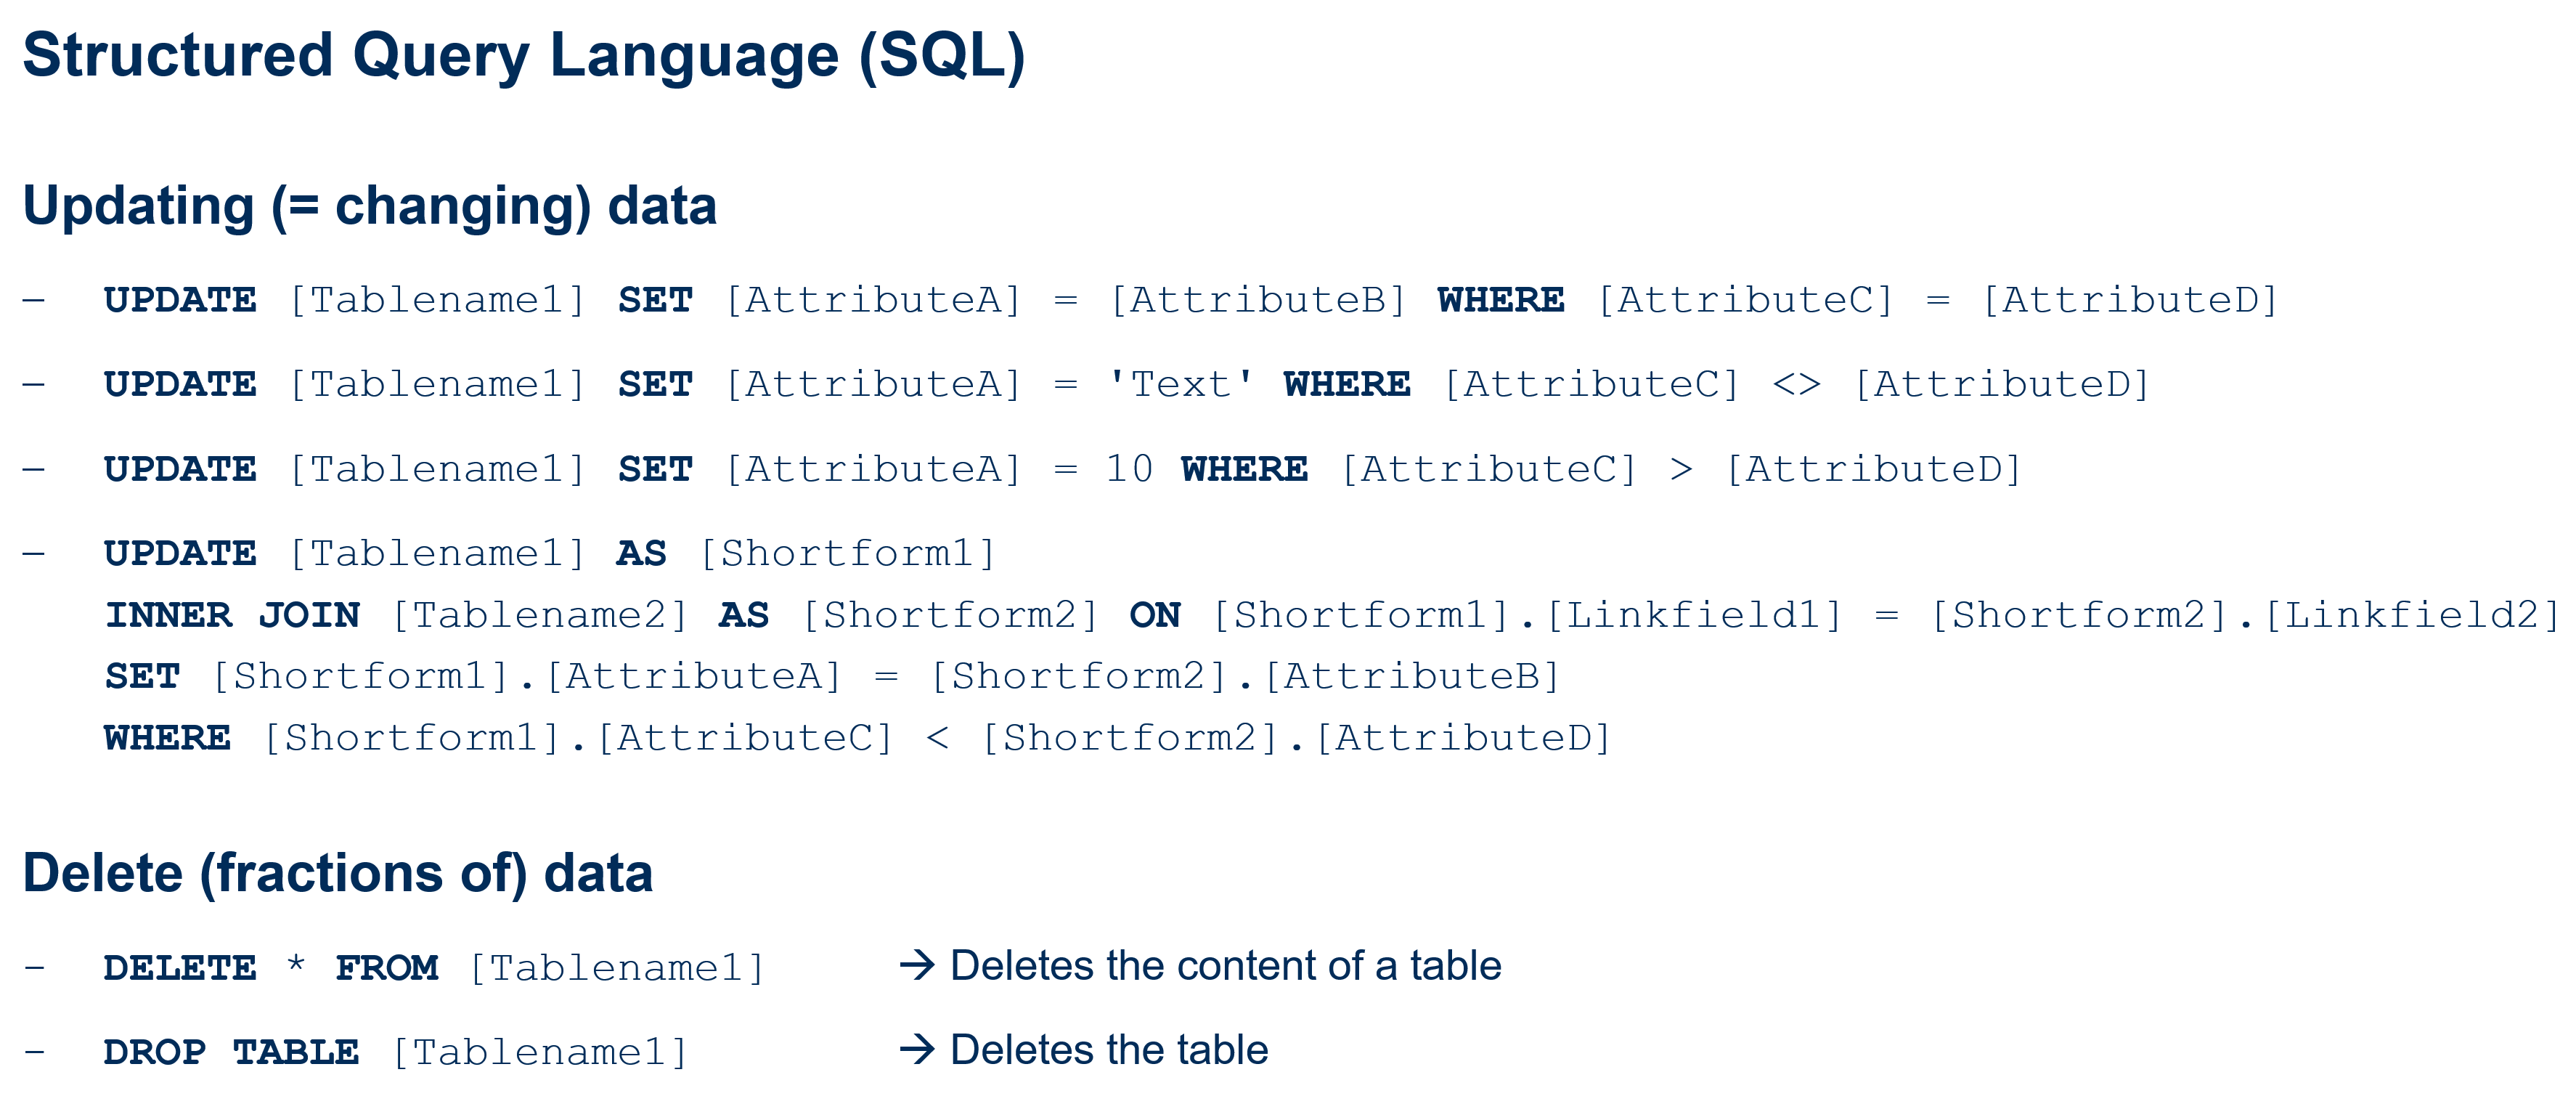

In [44]:
from IPython.display import Image
Image("img/sql2.PNG", width=700)

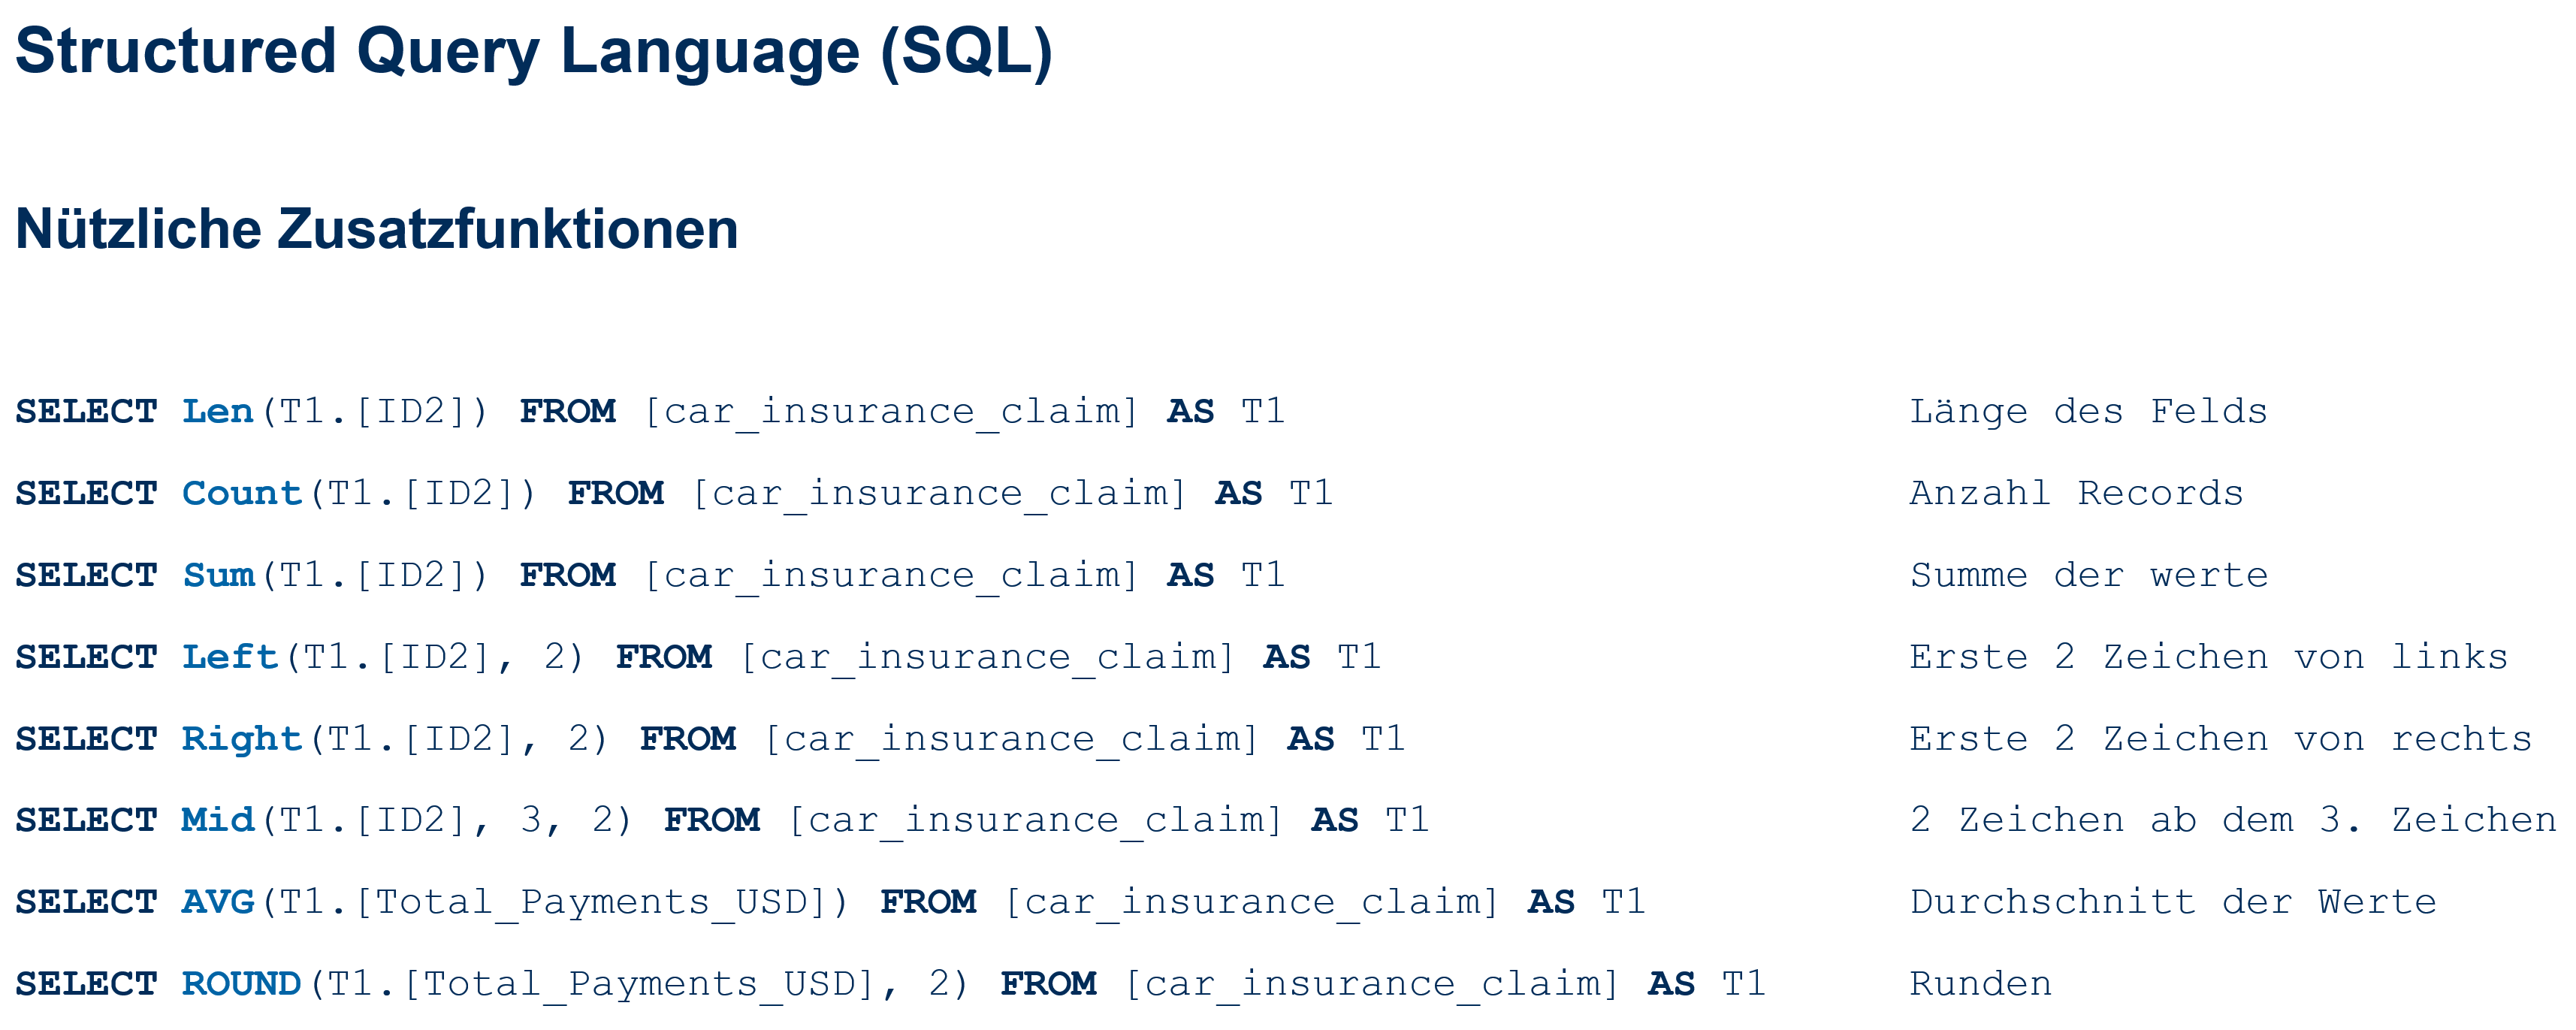

In [45]:
from IPython.display import Image
Image("img/sql3.PNG", width=800)

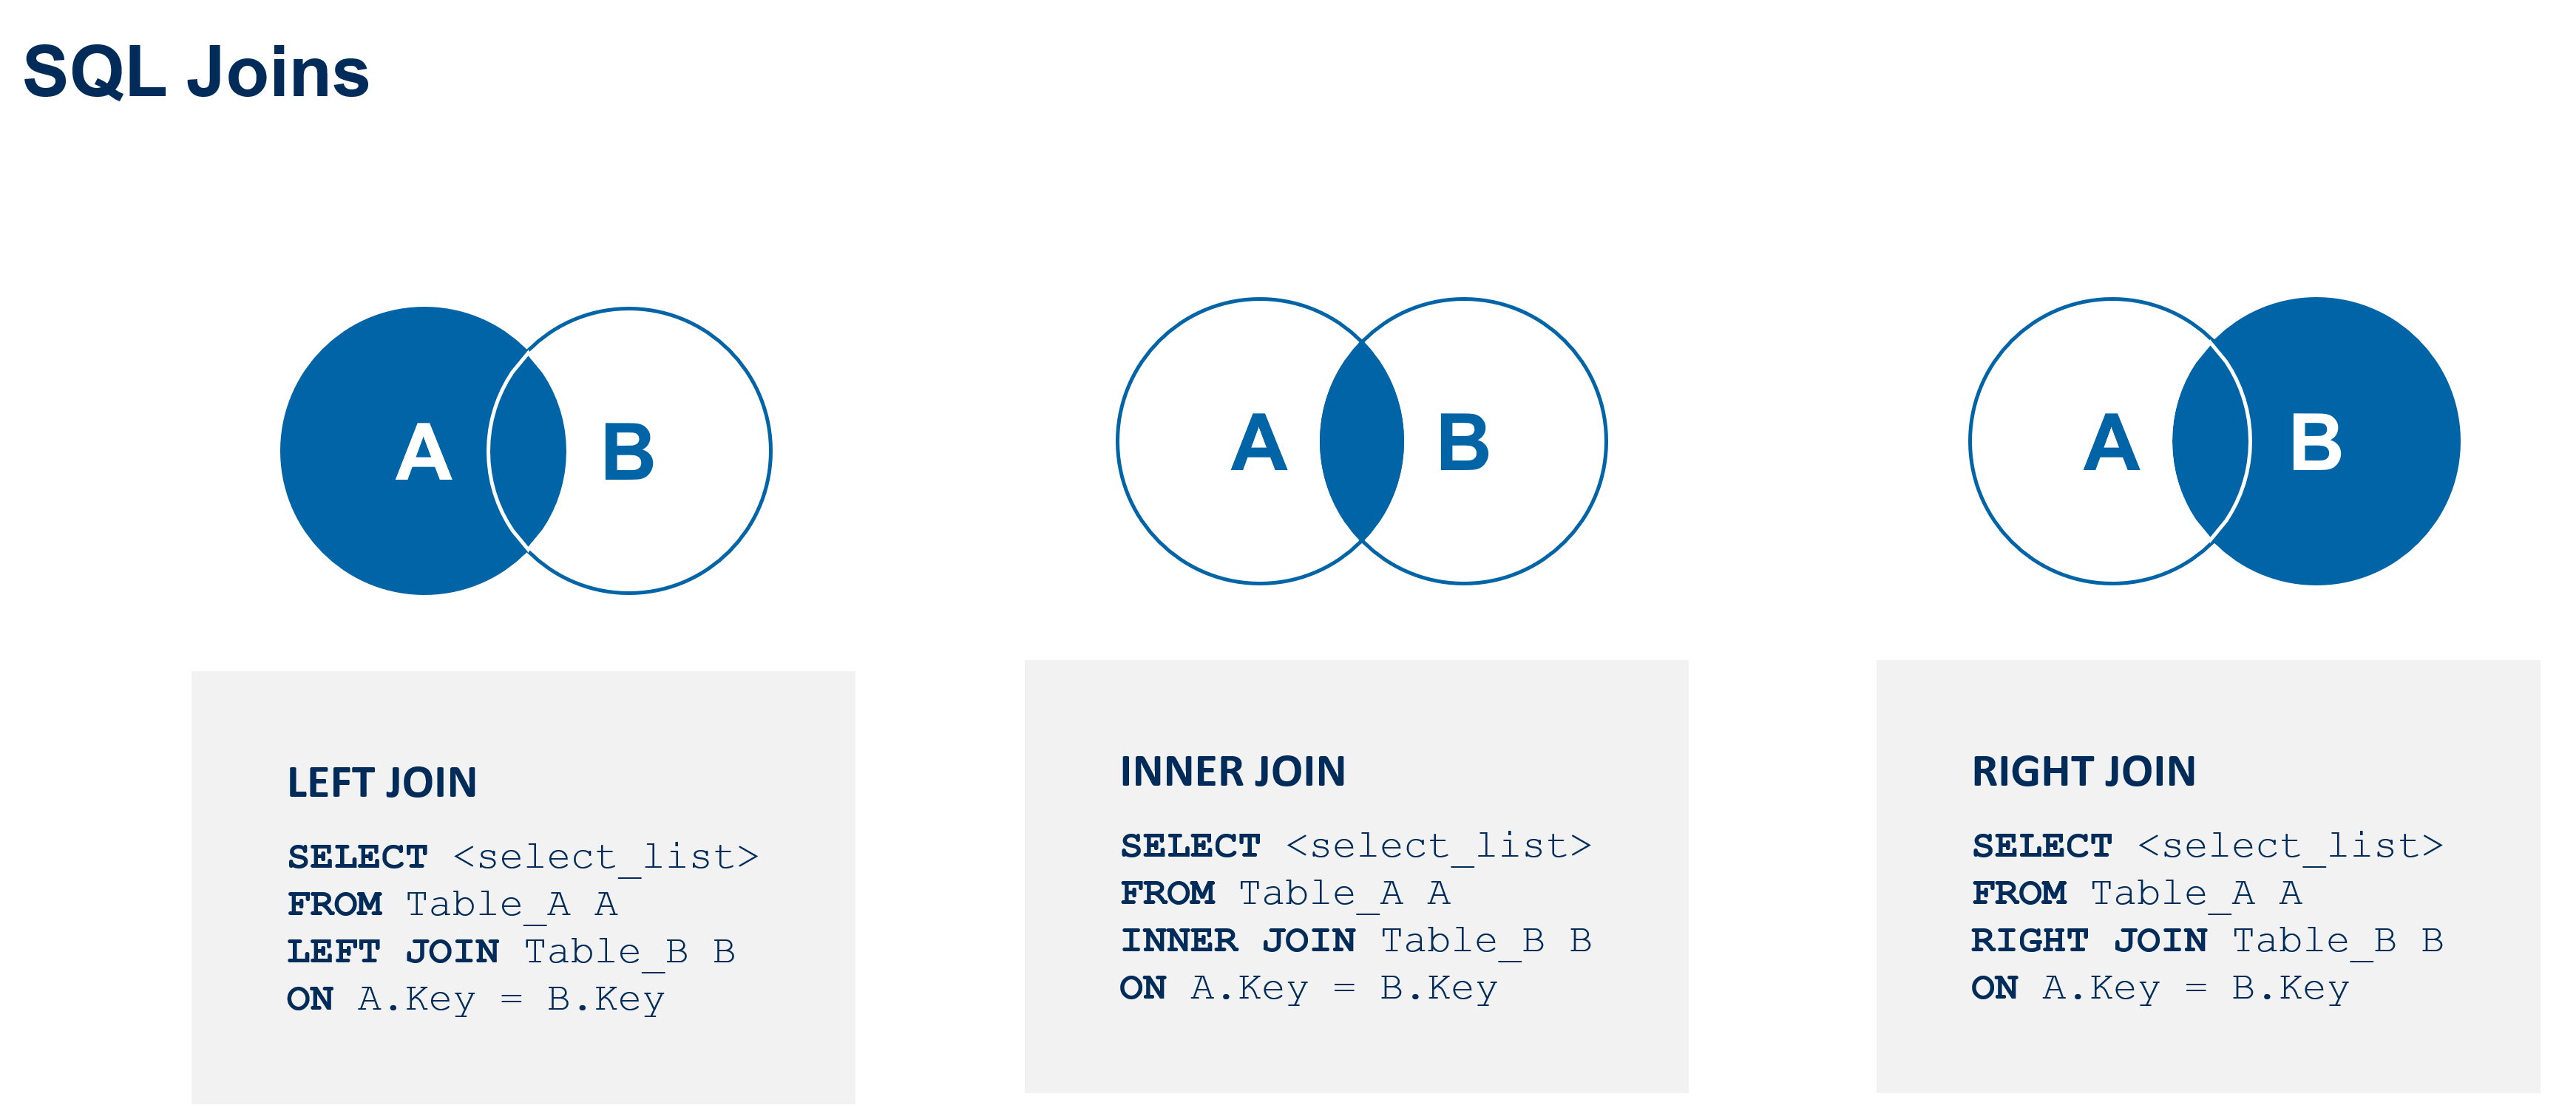

In [46]:
from IPython.display import Image
Image("img/join1.PNG", width=700)

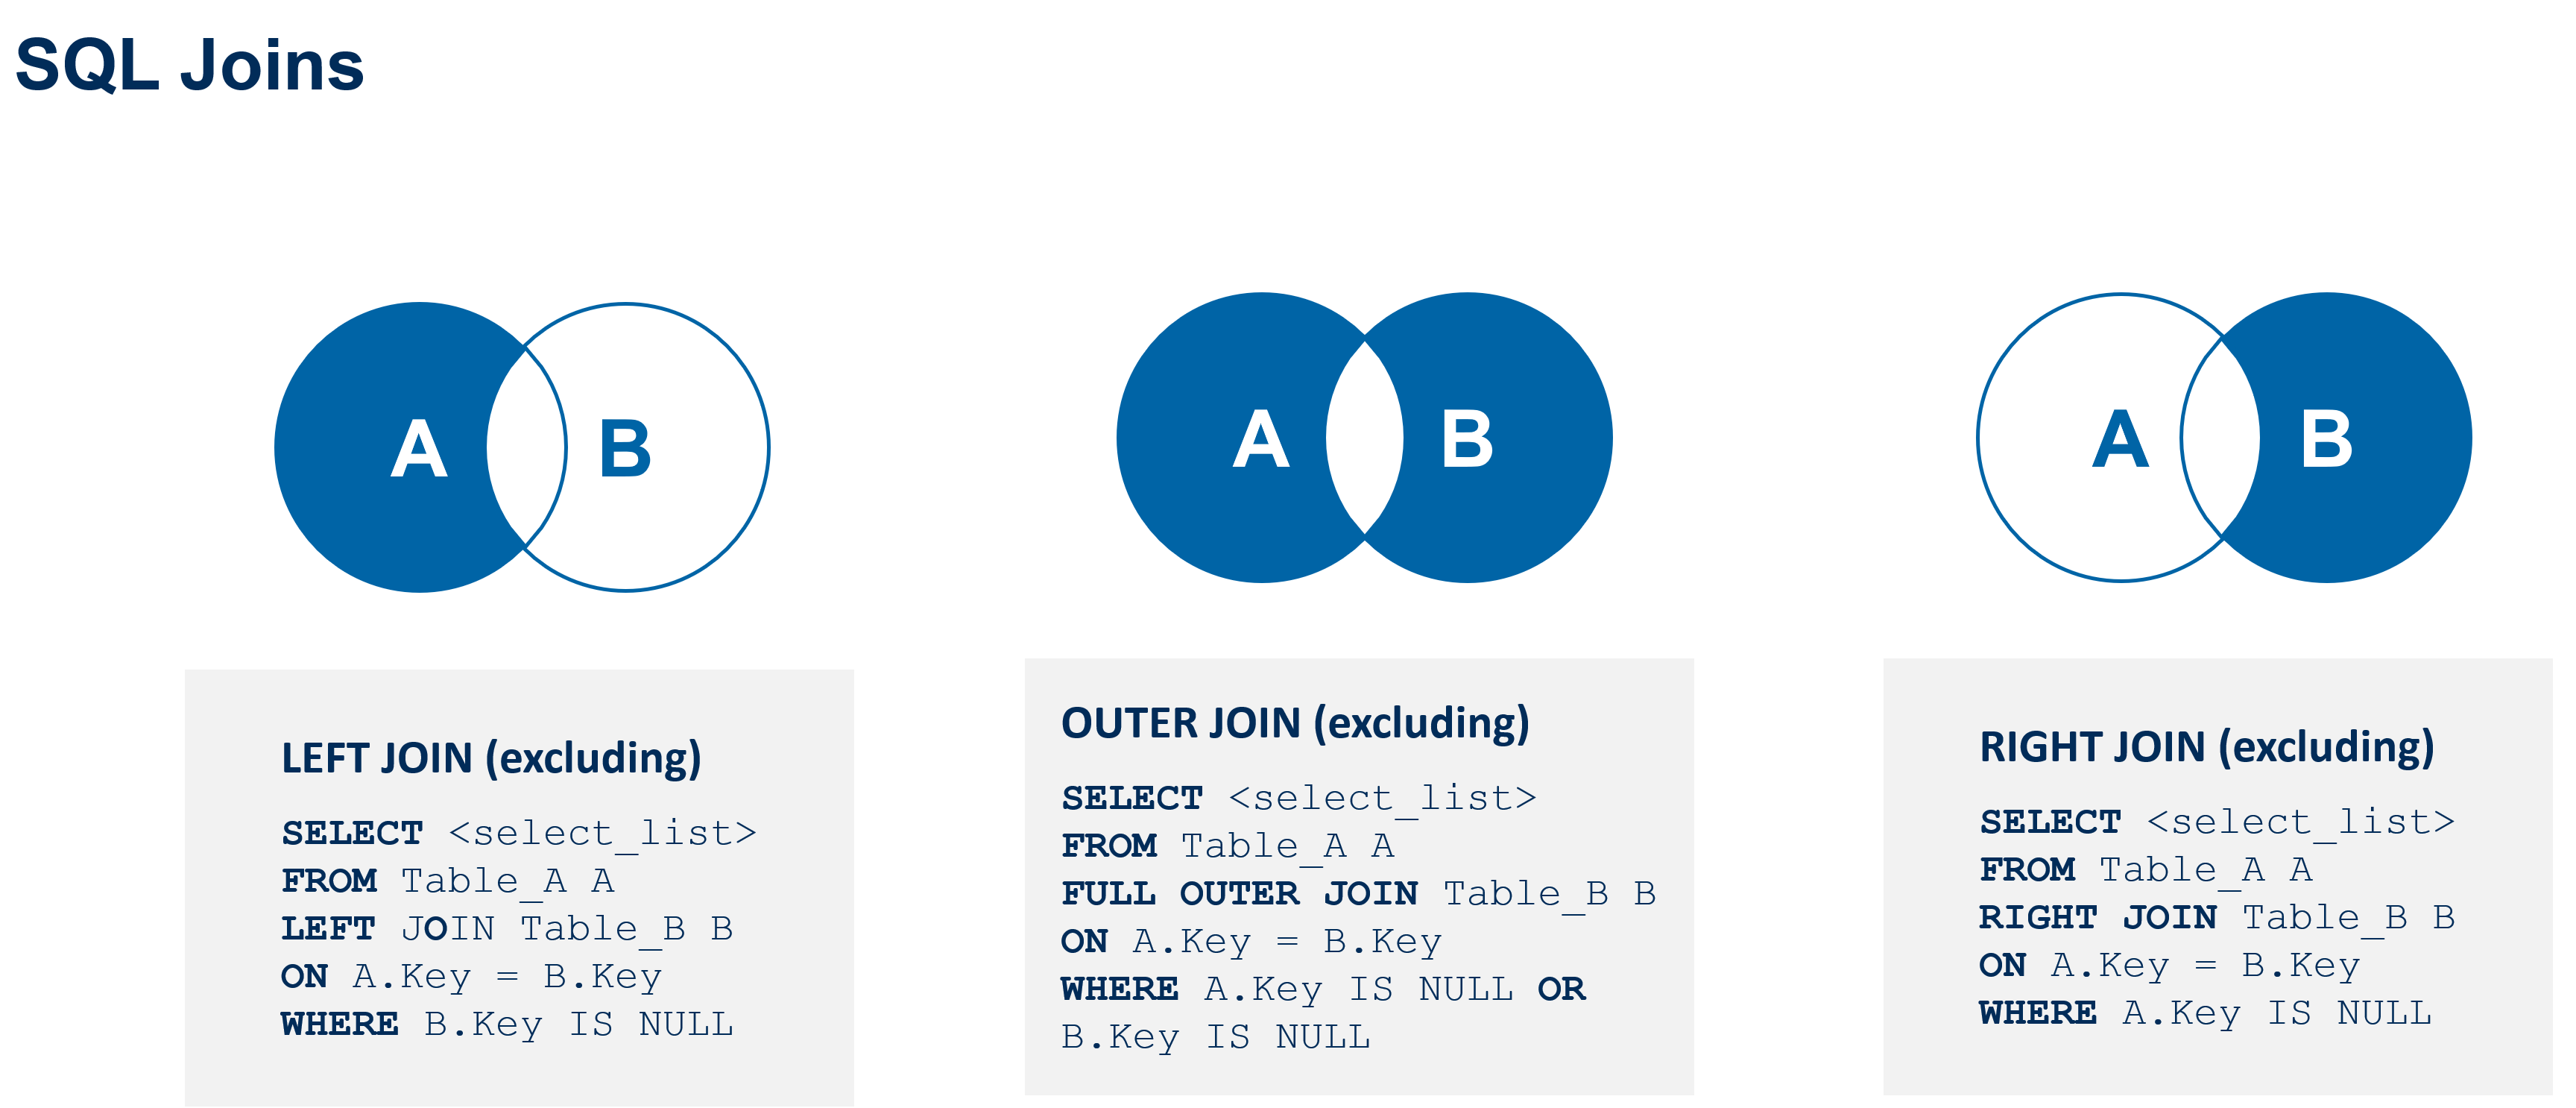

In [47]:
from IPython.display import Image
Image("img/join2.PNG", width=700)

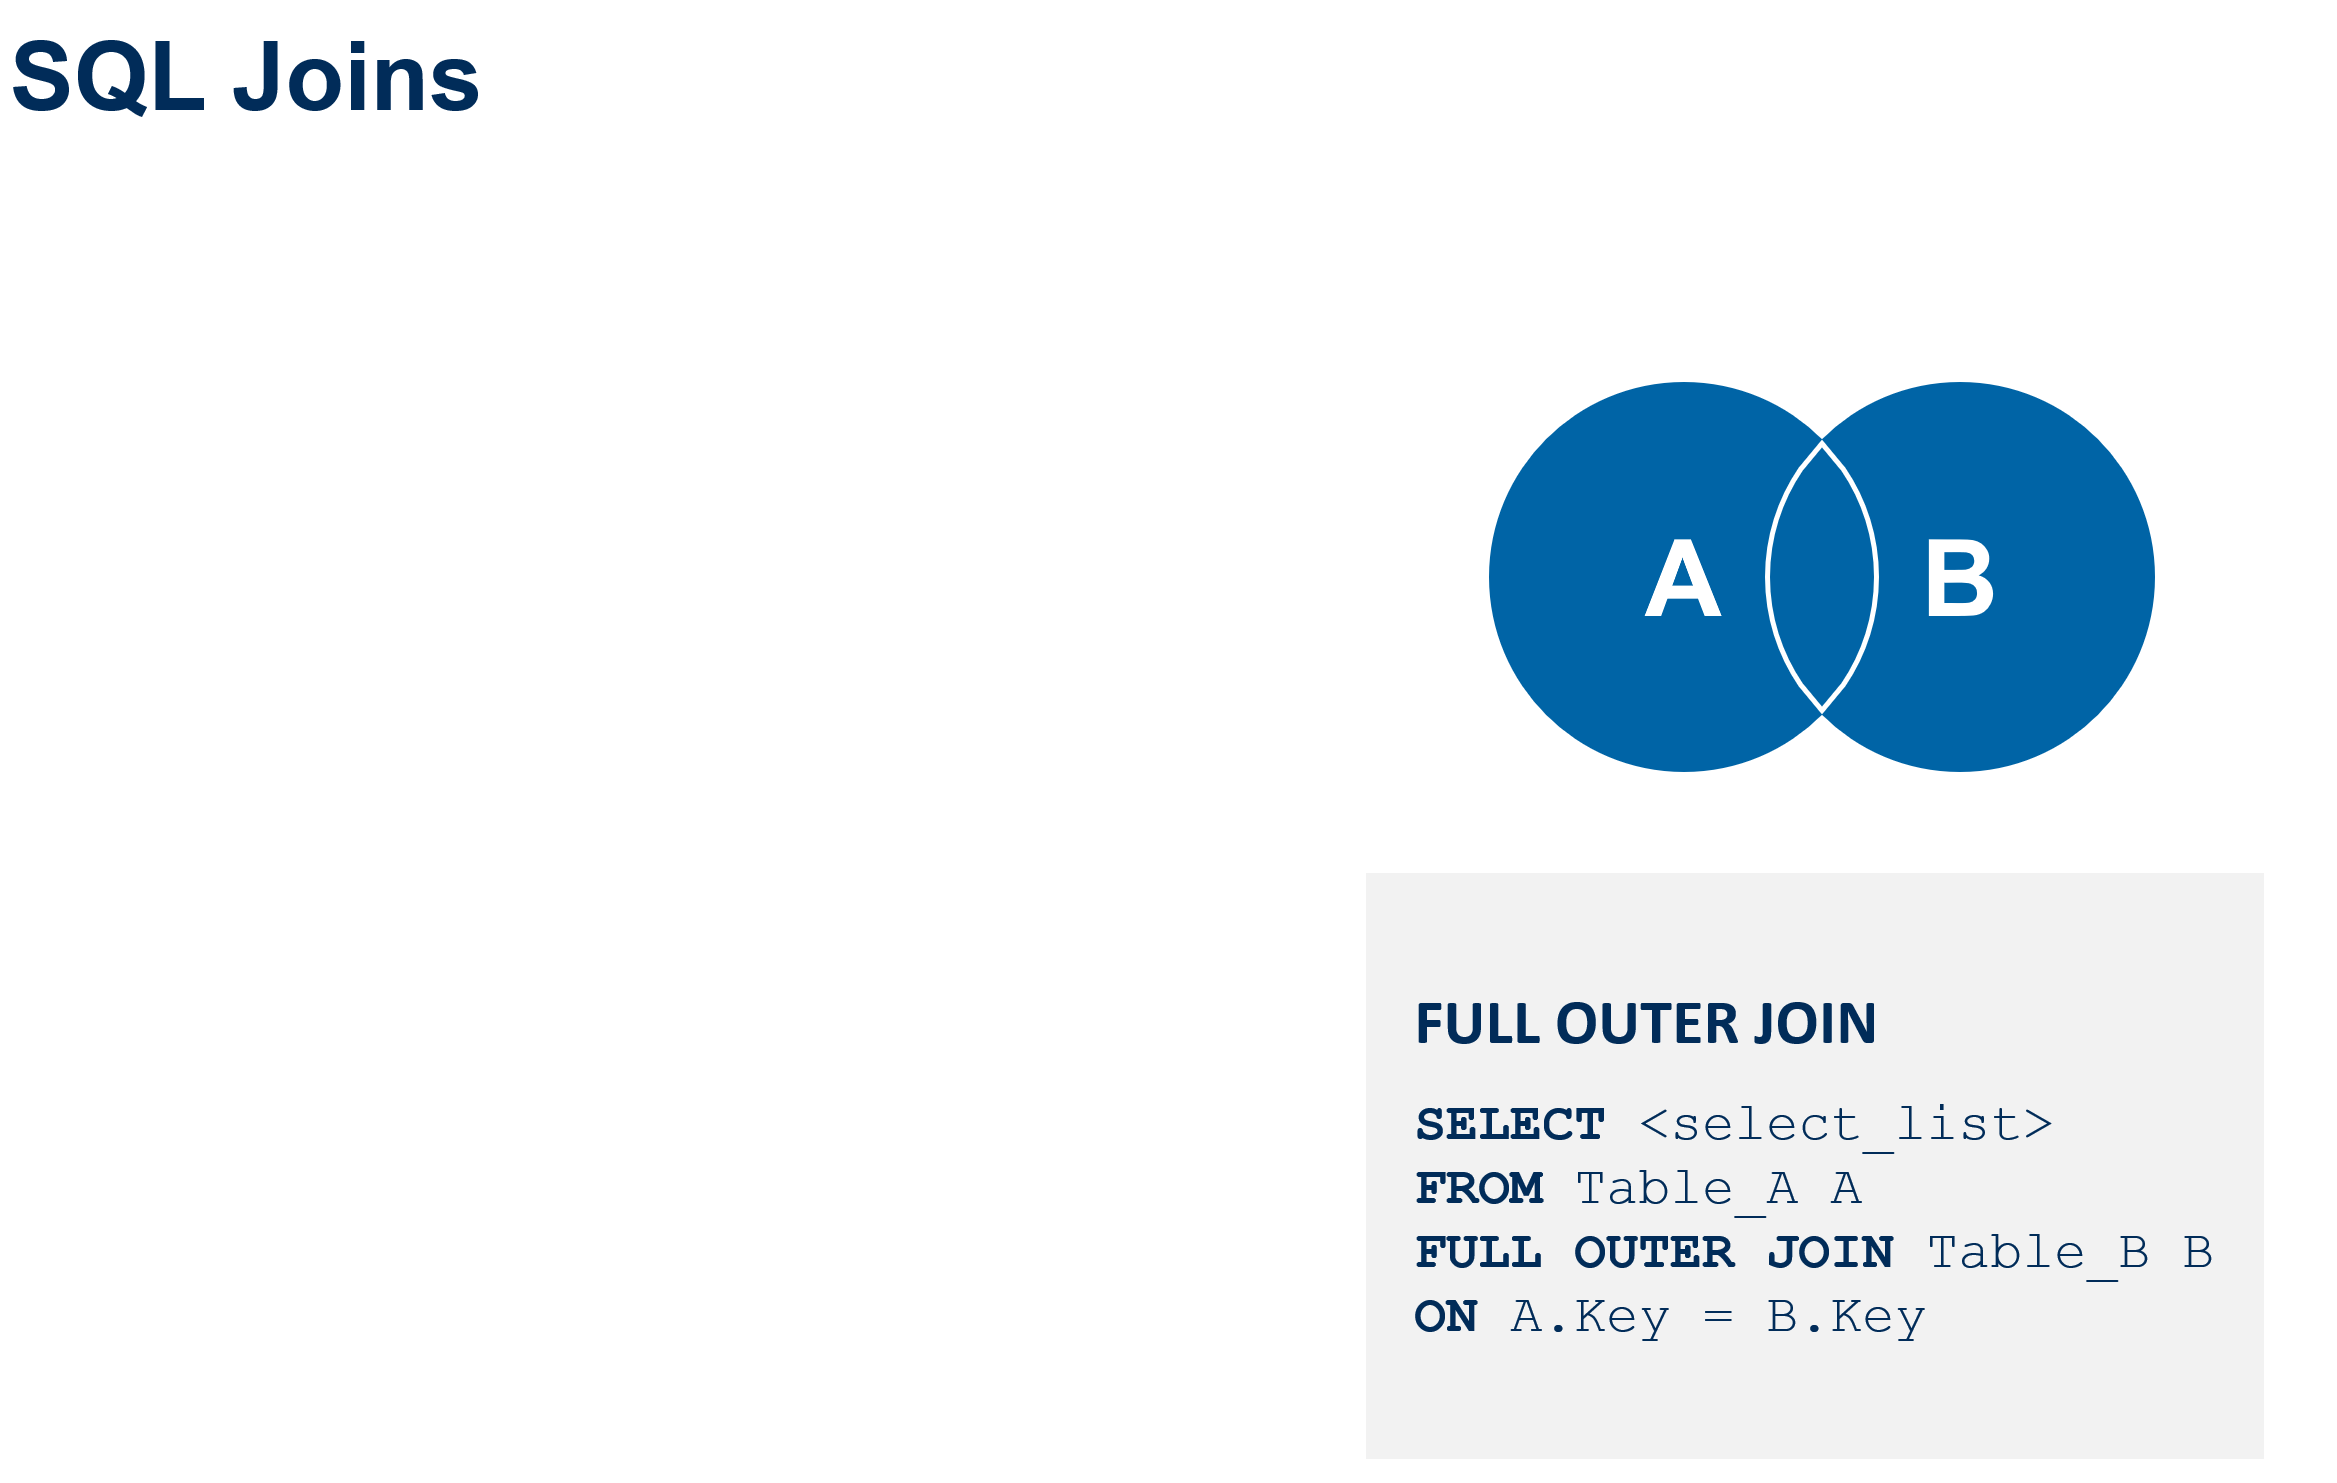

In [48]:
from IPython.display import Image
Image("img/join3.PNG", width=450)

### <font color='darkblue'>__1. Create a database in SQLite and insert data__</font>

#### <font color='darkblue'>__→ All data__</font>

##### <font color='darkblue'>__Read CSV into a dataframe__</font>

In [49]:
# Read data from your prepared example .csv-file into a dataframe (define seperator)
carinsurance_df = pd.read_csv("car_insurance_claim.csv", 
                              delimiter=';', 
                              header=None, 
                              skiprows=1, 
                              names=['ID',
                                     'KIDSDRIV',
                                     'AGE',
                                     'HOMEKIDS',
                                     'YOJ',
                                     'INCOME_USD',
                                     'PARENT1',
                                     'HOME_VAL_USD',
                                     'MSTATUS',
                                     'GENDER',
                                     'EDUCATION',
                                     'OCCUPATION',
                                     'TRAVTIME',
                                     'CAR_USE',
                                     'BLUEBOOK_USD',
                                     'TIF',
                                     'CAR_TYPE',
                                     'RED_CAR',
                                     'OLDCLAIM_USD',
                                     'CLM_FREQ',
                                     'REVOKED',
                                     'MVR_PTS',
                                     'CLM_AMT_USD',
                                     'CAR_AGE',
                                     'CLAIM_FLAG',
                                     'URBANICITY'], 
                              index_col=False)
carinsurance_df.head()

## Alterantive: Print the header info of data (first five rows)
# crimedata.head(5)

## Alternative import command (without specifying column names)
# carinsurance_df = pd.read_csv('car_insurance_claim.csv', index_col=False)
# carinsurance_df

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME_USD,PARENT1,HOME_VAL_USD,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM_USD,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT_USD,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743.0,0,60.0,0,11.0,67349,No,0,z_No,M,...,Minivan,yes,4461,2,No,3,0,18.0,0,Highly Urban/ Urban
1,132761049.0,0,43.0,0,11.0,91449,No,257252,z_No,M,...,Minivan,yes,0,0,No,0,0,1.0,0,Highly Urban/ Urban
2,921317019.0,0,48.0,0,11.0,52881,No,0,z_No,M,...,Van,yes,0,0,No,2,0,10.0,0,Highly Urban/ Urban
3,727598473.0,0,35.0,1,10.0,16039,No,124191,Yes,z_F,...,z_SUV,no,38690,2,No,3,0,10.0,0,Highly Urban/ Urban
4,450221861.0,0,51.0,0,14.0,0,No,306251,Yes,M,...,Minivan,yes,0,0,No,0,0,6.0,0,Highly Urban/ Urban


In [50]:
carinsurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10301 entries, 0 to 10300
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            8753 non-null   float64
 1   KIDSDRIV      10301 non-null  int64  
 2   AGE           10294 non-null  float64
 3   HOMEKIDS      10301 non-null  int64  
 4   YOJ           9753 non-null   float64
 5   INCOME_USD    10301 non-null  int64  
 6   PARENT1       10301 non-null  object 
 7   HOME_VAL_USD  10301 non-null  int64  
 8   MSTATUS       10301 non-null  object 
 9   GENDER        10301 non-null  object 
 10  EDUCATION     10301 non-null  object 
 11  OCCUPATION    9636 non-null   object 
 12  TRAVTIME      10301 non-null  int64  
 13  CAR_USE       10301 non-null  object 
 14  BLUEBOOK_USD  10301 non-null  int64  
 15  TIF           10301 non-null  int64  
 16  CAR_TYPE      10301 non-null  object 
 17  RED_CAR       10301 non-null  object 
 18  OLDCLAIM_USD  10301 non-nu

##### <font color='darkblue'>__Create database and fill it with the data from a dataframe__</font>

In [51]:
# Attention:
# If the database doesn't exist yet, this command will create a new one.
# If the database exists, then it will replace the data.

import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

conn = sql.connect('carinsurance.db')
carinsurance_df.to_sql('carinsurance_tbl', conn, if_exists='replace')

10301

#### <font color='darkblue'>__→ The master file for the car types__</font>

In [52]:
# Read data from your prepared example .csv-file into a dataframe (define seperator)
carinsurance_car_types_df = pd.read_csv("car_insurance_claim_cartypes.csv", 
                                        delimiter=';', 
                                        header=None, 
                                        skiprows=1, 
                                        names=['ID','CAR_TYPE', 'FULLY_COVERED'], 
                                        index_col=False)
carinsurance_car_types_df

,ID,CAR_TYPE,FULLY_COVERED
0,1,Minivan,yes
1,2,Van,yes
2,3,z_SUV,yes
3,4,Sports Car,no
4,5,Panel Truck,no
5,6,Pickup,yes


##### <font color='darkblue'>__Create database and fill it with the data from a dataframe__</font>

In [53]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

conn = sql.connect('carinsurance.db')
carinsurance_car_types_df.to_sql('carinsurance_car_types_tbl', conn, if_exists='replace')

6

#### <font color='darkblue'>__→ The master file for the occupation__</font>

In [54]:
# Read data from your prepared example .csv-file into a dataframe (define seperator)
carinsurance_occupation_df = pd.read_csv("car_insurance_claim_occupation.csv", 
                                         delimiter=';', 
                                         header=None, 
                                         skiprows=1, 
                                         names=['ID','occupation'], 
                                         index_col=False)
carinsurance_occupation_df

,ID,occupation
0,1,Professional
1,2,z_Blue Collar
2,3,Manager
3,4,Clerical
4,5,Doctor
5,6,Lawyer
6,8,Home Maker
7,9,Student


##### <font color='darkblue'>__Create database and fill it with the data from a dataframe__</font>

In [55]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

conn = sql.connect('carinsurance.db')
carinsurance_occupation_df.to_sql('carinsurance_claim_occupation_tbl', 
                                  conn, 
                                  if_exists='replace')

8

#  
### <font color='darkblue'>__2. Select Data into data frames__</font>

In [56]:
# Select all data from the table [carinsurance_tbl]
import sqlite3

conn                = sqlite3.connect("carinsurance.db")
cursor              = conn.cursor()
sqlite_select_query = """SELECT * FROM carinsurance_tbl WHERE AGE >= 80"""

cursor.execute(sqlite_select_query)
records = cursor.fetchall()

print(type(records), '\n')
print(records, '\n')
print('-------------', '\n')
print(pd.DataFrame(records))

<class 'list'> 

[(188, 493235037.0, 0, 80.0, 2, 23.0, 97716, 'No', 389344, 'Yes', 'M', 'Bachelors', 'Professional', 14, 'Private', 15920, 13, 'Minivan', 'yes', 0, 0, 'No', 2, 0, 10.0, 0, 'Highly Urban/ Urban'), (3031, 428282729.0, 0, 81.0, 2, 23.0, 109275, 'No', 381377, 'Yes', 'M', 'Bachelors', 'Professional', 39, 'Private', 22030, 7, 'Sports Car', 'yes', 4773, 2, 'No', 0, 0, 6.0, 0, 'Highly Urban/ Urban')] 

------------- 

     0            1   2     3   4     5       6   7       8    9   ...  \
0   188  493235037.0   0  80.0   2  23.0   97716  No  389344  Yes  ...   
1  3031  428282729.0   0  81.0   2  23.0  109275  No  381377  Yes  ...   

           17   18    19  20  21  22  23    24 25                   26  
0     Minivan  yes     0   0  No   2   0  10.0  0  Highly Urban/ Urban  
1  Sports Car  yes  4773   2  No   0   0   6.0  0  Highly Urban/ Urban  

[2 rows x 27 columns]


In [57]:
# Select all data from the table [carinsurance_tbl]
import sqlite3

conn = sqlite3.connect("carinsurance.db")

df_read = pd.read_sql("select * from carinsurance_tbl", con=conn)
conn.close()
df_read.head()

,index,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME_USD,PARENT1,HOME_VAL_USD,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM_USD,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT_USD,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,63581743.0,0,60.0,0,11.0,67349,No,0,z_No,...,Minivan,yes,4461,2,No,3,0,18.0,0,Highly Urban/ Urban
1,1,132761049.0,0,43.0,0,11.0,91449,No,257252,z_No,...,Minivan,yes,0,0,No,0,0,1.0,0,Highly Urban/ Urban
2,2,921317019.0,0,48.0,0,11.0,52881,No,0,z_No,...,Van,yes,0,0,No,2,0,10.0,0,Highly Urban/ Urban
3,3,727598473.0,0,35.0,1,10.0,16039,No,124191,Yes,...,z_SUV,no,38690,2,No,3,0,10.0,0,Highly Urban/ Urban
4,4,450221861.0,0,51.0,0,14.0,0,No,306251,Yes,...,Minivan,yes,0,0,No,0,0,6.0,0,Highly Urban/ Urban


In [58]:
# Select records from the table [carinsurance_tbl]
import sqlite3

conn = sqlite3.connect("carinsurance.db")

df_read = pd.read_sql('''SELECT * FROM carinsurance_tbl 
                      WHERE AGE > 40 
                      AND AGE <> 50 
                      AND (CAR_TYPE = 'Minivan' OR CAR_TYPE = 'z_SUV')''', 
                      con=conn)
conn.close()
df_read.head()

,index,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME_USD,PARENT1,HOME_VAL_USD,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM_USD,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT_USD,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,63581743.0,0,60.0,0,11.0,67349,No,0,z_No,...,Minivan,yes,4461,2,No,3,0,18.0,0,Highly Urban/ Urban
1,1,132761049.0,0,43.0,0,11.0,91449,No,257252,z_No,...,Minivan,yes,0,0,No,0,0,1.0,0,Highly Urban/ Urban
2,4,450221861.0,0,51.0,0,14.0,0,No,306251,Yes,...,Minivan,yes,0,0,No,0,0,6.0,0,Highly Urban/ Urban
3,7,792300541.0,0,54.0,0,NaN,18755,No,0,Yes,...,z_SUV,no,0,0,No,0,0,1.0,0,Highly Urban/ Urban
4,9,3577610.0,0,44.0,2,12.0,43486,Yes,0,z_No,...,z_SUV,no,0,0,No,0,0,10.0,0,z_Highly Rural/ Rural


In [59]:
# Select records from the table [carinsurance_tbl] and make inner join
import sqlite3

conn = sqlite3.connect("carinsurance.db")

df_read = pd.read_sql('''SELECT * FROM carinsurance_tbl as T1 
                      INNER JOIN carinsurance_car_types_tbl as T2 
                      ON T1.CAR_TYPE = T2.CAR_TYPE 
                      WHERE T2.ID = 4''', 
                      con=conn)
conn.close()
df_read.head()

,index,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME_USD,PARENT1,HOME_VAL_USD,MSTATUS,...,REVOKED,MVR_PTS,CLM_AMT_USD,CAR_AGE,CLAIM_FLAG,URBANICITY,index,ID,CAR_TYPE,FULLY_COVERED
0,6,871024631.0,0,34.0,1,12.0,125301,Yes,0,z_No,...,No,0,2946,7.0,1,Highly Urban/ Urban,3,4,Sports Car,no
1,13,308455362.0,0,53.0,0,14.0,77100,No,0,z_No,...,No,0,6077,11.0,1,Highly Urban/ Urban,3,4,Sports Car,no
2,30,201327208.0,0,60.0,0,12.0,37940,No,182739,Yes,...,No,0,5247,1.0,1,Highly Urban/ Urban,3,4,Sports Car,no
3,46,745183922.0,0,50.0,0,8.0,167469,No,0,z_No,...,No,3,0,1.0,0,Highly Urban/ Urban,3,4,Sports Car,no
4,50,807174588.0,0,43.0,0,13.0,75338,No,270555,Yes,...,No,0,0,8.0,0,Highly Urban/ Urban,3,4,Sports Car,no


In [60]:
# Check, if there are CAR_TYPES in the table [carinsurance_car_types_tbl] which 
# are not represented in the table [carinsurance_tbl]
import sqlite3

conn = sqlite3.connect("carinsurance.db")

df_read = pd.read_sql('''SELECT * FROM carinsurance_car_types_tbl as T1 
                      LEFT JOIN carinsurance_tbl as T2 
                      ON T1.CAR_TYPE = T2.CAR_TYPE 
                      WHERE T2.CAR_TYPE is Null''', 
                      con=conn)
conn.close()
df_read

,index,ID,CAR_TYPE,FULLY_COVERED,index,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,...,CAR_TYPE,RED_CAR,OLDCLAIM_USD,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT_USD,CAR_AGE,CLAIM_FLAG,URBANICITY


#  
### <font color='darkblue'>__3. Update Data__</font>

In [61]:
# Update (change) the data in the table [carinsurance_tbl]
import sqlite3

conn = sqlite3.connect("carinsurance.db")
cursor = conn.cursor()

cursor.execute("UPDATE carinsurance_tbl SET URBANICITY = 'Highly Urban' WHERE ID = 63581743 ")
conn.commit()

In [62]:
cursor.close()
conn.close()

In [63]:
# Check if the result of the update
import sqlite3

conn = sqlite3.connect("carinsurance.db")

df_read = pd.read_sql("SELECT * FROM carinsurance_tbl WHERE ID = 63581743", con=conn)
conn.close()
df_read

,index,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME_USD,PARENT1,HOME_VAL_USD,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM_USD,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT_USD,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,63581743.0,0,60.0,0,11.0,67349,No,0,z_No,...,Minivan,yes,4461,2,No,3,0,18.0,0,Highly Urban


#  
### <font color='darkblue'>__4. Insert Data__</font>

In [64]:
# Add new records to the table [carinsurance_claim_occupation_tbl]
import sqlite3

conn = sqlite3.connect("carinsurance.db")
cursor = conn.cursor()

cursor.execute("INSERT INTO carinsurance_claim_occupation_tbl (ID, occupation) VALUES (10, 'None')")
conn.commit()

In [65]:
cursor.close()
conn.close()

In [66]:
# Check the result
import sqlite3

conn = sqlite3.connect("carinsurance.db")

df_read = pd.read_sql("SELECT * FROM carinsurance_claim_occupation_tbl WHERE ID = 10", con=conn)
conn.close()
df_read

,index,ID,occupation
0,None,10,None


#  
### <font color='darkblue'>__5. Delete Data__</font>

In [67]:
# Delete all the data from the table [carinsurance_tbl]
import sqlite3

connection = sqlite3.connect("carinsurance.db")
cursor = connection.cursor()

cursor.execute("DELETE FROM carinsurance_claim_occupation_tbl WHERE ID = 10" )
connection.commit()

In [68]:
cursor.close()
connection.close()

In [69]:
# Check the result
import sqlite3

conn = sqlite3.connect("carinsurance.db")

df_read = pd.read_sql("SELECT * FROM carinsurance_claim_occupation_tbl WHERE ID = 10", con=conn)
conn.close()
df_read

,index,ID,occupation


#  
### <font color='darkblue'>__6. Optional Environment: View your data on SQLLite Online__</font>

##### SQLLite Online is an open source tool, which allows us to access the data in our sqllite database on a web based user interface
##### --> Open the Website https://sqliteonline.com/
##### --> Go on File --> Open DB (on the left upper corner)
##### --> Choose the *.db file you created (e.g. crime.db)
##### --> Write your query into the upper window (which already contains a query example) and run it by clicking on "Run" or pressing "Shift + Enter"

## <a id='tasks'></a> 
### <font color='darkblue'>__Tasks: Case "Car Insurance"__</font>

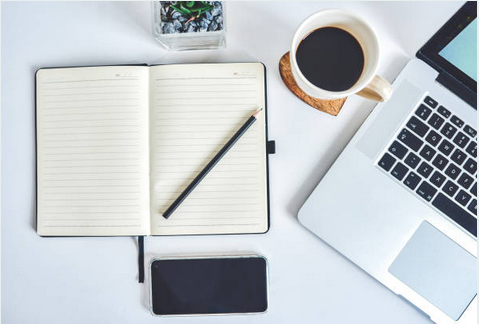

In [70]:
from IPython.display import Image
Image("img/homework.PNG", width=300)

#### Work with the SQLLite database "carinsurance.db“ (which you created in the class exercises with your Jupyter Notebook). Please create and conduct the following queries and export the notebook to a pdf.

__Task: 1.__<br>
Let's assume, the car insurance company has accepted clients with car types, they didn't have before. Add the car types 'Coupe' and 'Convertible' to the table [carinsurance_car_types_tbl]. Coupes are not fully covered in the insurance (FULLY_COVERED = 'no'), but Convertibles are fully convered in the insurance (FULLY_COVERED = 'yes').<br>

__Task: 2.__<br>
The car insurance company found a few records in the table carinsurance_tbl, where the car type was not recorded correctly by the employee. Update the table carinsurance_tbl by changing the following records:<br>
ID: 132761049, Correct CAR_TYPE: Convertible<br>
ID: 201327208, Correct CAR_TYPE: Coupe<br>

__Task: 3__<br>
Show all the clients, which are fully covered by the insurance. Create for this purpose a select query on the table "carinsurance_tbl" with a inner join to the table "carinsurance_car_types_tbl", where you find the needed information (attribute "FULLY_COVERED" = 'yes').

#  
#### <font color='darkblue'>9.1 Show all the data in the table [carinsurance_tbl]</font>

In [71]:
import sqlite3

conn = sqlite3.connect("carinsurance.db")

df_read = pd.read_sql("SELECT * FROM carinsurance_tbl", con=conn)
conn.close()
df_read.head()

,index,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME_USD,PARENT1,HOME_VAL_USD,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM_USD,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT_USD,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,63581743.0,0,60.0,0,11.0,67349,No,0,z_No,...,Minivan,yes,4461,2,No,3,0,18.0,0,Highly Urban
1,1,132761049.0,0,43.0,0,11.0,91449,No,257252,z_No,...,Minivan,yes,0,0,No,0,0,1.0,0,Highly Urban/ Urban
2,2,921317019.0,0,48.0,0,11.0,52881,No,0,z_No,...,Van,yes,0,0,No,2,0,10.0,0,Highly Urban/ Urban
3,3,727598473.0,0,35.0,1,10.0,16039,No,124191,Yes,...,z_SUV,no,38690,2,No,3,0,10.0,0,Highly Urban/ Urban
4,4,450221861.0,0,51.0,0,14.0,0,No,306251,Yes,...,Minivan,yes,0,0,No,0,0,6.0,0,Highly Urban/ Urban


#  
#### <font color='darkblue'>9.2 Show all the data in the table [car_insurance_claim_occupation_tbl]</font>

In [72]:
import sqlite3

conn = sqlite3.connect("carinsurance.db")

df_read = pd.read_sql("SELECT * FROM carinsurance_claim_occupation_tbl", con=conn)
conn.close()
df_read

,index,ID,occupation
0,0,1,Professional
1,1,2,z_Blue Collar
2,2,3,Manager
3,3,4,Clerical
4,4,5,Doctor
5,5,6,Lawyer
6,6,8,Home Maker
7,7,9,Student


#  
#### <font color='darkblue'>9.3 Show all the data in the table [carinsurance_car_types_tbl]</font>

In [73]:
import sqlite3

conn = sqlite3.connect("carinsurance.db")

df_read = pd.read_sql("SELECT * FROM carinsurance_car_types_tbl", con=conn)
conn.close()
df_read

,index,ID,CAR_TYPE,FULLY_COVERED
0,0,1,Minivan,yes
1,1,2,Van,yes
2,2,3,z_SUV,yes
3,3,4,Sports Car,no
4,4,5,Panel Truck,no
5,5,6,Pickup,yes


#  
#### <font color='darkblue'>9.4 Adding the new car types "Coupe" and "Convertible" to the table [carinsurance_car_types_tbl]</font>

##### Task: 1. Let's assume, car insurance company has accepted clients with car types, they didn't have before. Add the car types 'Coupe' and 'Convertible' to the table [carinsurance_car_types_tbl]. Coupes are not fully covered in the insurance (FULLY_COVERED = 'no), but Convertibles are fully convered in the insurance (FULLY_COVERED = 'yes').

In [74]:
import sqlite3

conn = sqlite3.connect("carinsurance.db")

df_read = pd.read_sql("SELECT max(ID) + 1, max(ID) + 2 FROM carinsurance_car_types_tbl", con=conn)
conn.close()
df_read

,max(ID) + 1,max(ID) + 2
0,7,8


In [75]:
# Add new records to the table [car_insurance_claim_occupation_tbl]
import sqlite3

conn = sqlite3.connect("carinsurance.db")
cursor = conn.cursor()

cursor.execute("INSERT INTO carinsurance_car_types_tbl (ID, CAR_TYPE, FULLY_COVERED) VALUES (9, 'Coupe', 'no')")
cursor.execute("INSERT INTO carinsurance_car_types_tbl (ID, CAR_TYPE, FULLY_COVERED) VALUES (10, 'Convertible', 'yes')")
conn.commit()

In [76]:
cursor.close()
conn.close()

In [77]:
# Check the result
import sqlite3

conn = sqlite3.connect("carinsurance.db")

df_read = pd.read_sql("SELECT * FROM carinsurance_car_types_tbl", con=conn)
conn.close()
df_read

,index,ID,CAR_TYPE,FULLY_COVERED
0,0.0,1,Minivan,yes
1,1.0,2,Van,yes
2,2.0,3,z_SUV,yes
3,3.0,4,Sports Car,no
4,4.0,5,Panel Truck,no
5,5.0,6,Pickup,yes
6,NaN,9,Coupe,no
7,NaN,10,Convertible,yes


#  
#### <font color='darkblue'>9.5 Updating records in the table [carinsurance_tbl]</font>

##### Task: 2. The car insurance company found a few records in the table carinsurance_tbl, where the car type was not recorded correctly by the employee. Update the table carinsurance_tbl by changing the following records:
##### ID: 132761049, Correct CAR_TYPE: Convertible
##### ID: 201327208, Correct CAR_TYPE: Coupe

In [78]:
# Update (change) the data in the table [carinsurance_tbl]
import sqlite3

conn = sqlite3.connect("carinsurance.db")
cursor = conn.cursor()

cursor.execute("UPDATE carinsurance_tbl SET CAR_TYPE = 'Convertible' WHERE ID = 132761049 ")
cursor.execute("UPDATE carinsurance_tbl SET CAR_TYPE = 'Coupe' WHERE ID = 201327208 ")
conn.commit()

In [79]:
cursor.close()
conn.close()

In [80]:
# Check the result of the update
import sqlite3

conn = sqlite3.connect("carinsurance.db")

df_read = pd.read_sql("SELECT * FROM carinsurance_tbl WHERE ID = 132761049 OR ID = 201327208", con=conn)
conn.close()
df_read

,index,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME_USD,PARENT1,HOME_VAL_USD,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM_USD,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT_USD,CAR_AGE,CLAIM_FLAG,URBANICITY
0,1,132761049.0,0,43.0,0,11.0,91449,No,257252,z_No,...,Convertible,yes,0,0,No,0,0,1.0,0,Highly Urban/ Urban
1,30,201327208.0,0,60.0,0,12.0,37940,No,182739,Yes,...,Coupe,no,0,0,No,0,5247,1.0,1,Highly Urban/ Urban


#  
#### <font color='darkblue'>9.6 Run a select query with a join on the tables [carinsurance_tbl] and [carinsurance_car_types_tbl]</font>

##### Task: 3. Show all the clients, which are fully covered by the insurance. Create for this purpose a select query on the table "carinsurance_tbl" with a inner join to the table "carinsurance_car_types_tbl", where you find the needed information (attribute "FULLY_COVERED").

In [81]:
import sqlite3

conn = sqlite3.connect("carinsurance.db")

df_read = pd.read_sql('''SELECT * FROM [carinsurance_tbl] as T1 
                      INNER JOIN [carinsurance_car_types_tbl] as T2 
                      ON T1.[CAR_TYPE] = T2.[CAR_TYPE] 
                      WHERE T2.[FULLY_COVERED] ='yes' ''', 
                      con=conn)
conn.close()
df_read

,index,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME_USD,PARENT1,HOME_VAL_USD,MSTATUS,...,REVOKED,MVR_PTS,CLM_AMT_USD,CAR_AGE,CLAIM_FLAG,URBANICITY,index,ID,CAR_TYPE,FULLY_COVERED
0,0,63581743.0,0,60.0,0,11.0,67349,No,0,z_No,...,No,3,0,18.0,0,Highly Urban,0.0,1,Minivan,yes
1,4,450221861.0,0,51.0,0,14.0,0,No,306251,Yes,...,No,0,0,6.0,0,Highly Urban/ Urban,0.0,1,Minivan,yes
2,8,7945239.0,1,40.0,1,11.0,50815,Yes,0,z_No,...,No,2,6477,1.0,1,Highly Urban/ Urban,0.0,1,Minivan,yes
3,14,989828809.0,0,43.0,0,5.0,52642,No,209970,Yes,...,No,0,0,1.0,0,z_Highly Rural/ Rural,0.0,1,Minivan,yes
4,20,162166370.0,0,59.0,0,12.0,87460,No,0,z_No,...,No,4,4111,1.0,1,Highly Urban/ Urban,0.0,1,Minivan,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,10257,NaN,2,46.0,0,11.0,35362,No,0,z_No,...,Yes,3,2318,7.0,1,Highly Urban/ Urban,5.0,6,Pickup,yes
8265,10286,NaN,0,45.0,0,11.0,52966,No,0,z_No,...,Yes,5,2967,1.0,1,Highly Urban/ Urban,5.0,6,Pickup,yes
8266,10293,NaN,1,38.0,4,16.0,12717,No,0,Yes,...,No,3,0,15.0,0,Highly Urban/ Urban,5.0,6,Pickup,yes
8267,10294,NaN,0,41.0,0,7.0,6256,No,0,z_No,...,No,0,0,7.0,0,z_Highly Rural/ Rural,5.0,6,Pickup,yes


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [82]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1012-azure
Datetime: 2023-10-04 06:13:35
Python Version: 3.11.5
-----------------------------------
